# ASTR 310 Spring 2024 --- Final Project

## Instructions

- The final project may not be submitted late, but you may upload draft files and
replace them with a final version at any time up until the deadline. It's not as long as it looks, but don't wait until the
last minute to start!
- As this project stands in lieu of a final exam, the projects must be your own work and must not be discussed with your peers
prior to submission.
- We will answer clarifying questions, but we will not offer as much assistance as we do with homework assignments. This is a summative
assignment meant to show what you can do on your own after taking the course.
- You are encouraged to consult the lecture and reading slides as well as Python, NumPy/SciPy, and Astropy documentation that you can find online.  You can also ask us for clarification on the materials in the lecture and reading slides.
- Do not ask any other entities (peers, online forums, other faculty, or LLMs) to help or do the work for you; violations will be treated as academic integrity infractions.
- Experience suggests that your machine's latex typesetting may look different in this notebook than it does on the PDF document.  In case of discrepancies, the PDF version is definitive.  Best to do a quick comparison to see whether they are the same.
- If you get stuck on any one part of this project, you may still be able to move forward and complete other parts of the project.

### 0.  Don't panic!  

It looks long because I have written out the steps in great detail, but the individual steps are not large.


### 1.  Fourier Analysis

Here we're going to construct the Fourier series for a discretely sampled function and show how the Fourier series allows us to approximate the original function.

**a.)** Download the file `plot-data.csv` and read it into python.  The data points $y(x)$ form the function we'll be analyzing. [3 pts]

In [181]:
import pandas as pd
path = "plot-data.csv"
data = pd.read_csv(path)
print(data.head())

        # x         y
0  0.000000  0.000000
1  1.000000  0.000000
2  2.000000  0.000000
3  2.375367  0.058140
4  2.551320  0.465116


**b.)** Notice that the data points are not regularly sampled.  Therefore, interpolate the data onto a regular grid of $x-$values.  If you use somewhere between 200 and 1000 grid points you won't lose much information.
For future reference, we will call the number of grid points $N$ and the interpolated data points $f(x_\ell)$ for $\ell = 0, 1, ... N-1.$ [3 pts]

Index(['# x', ' y'], dtype='object')


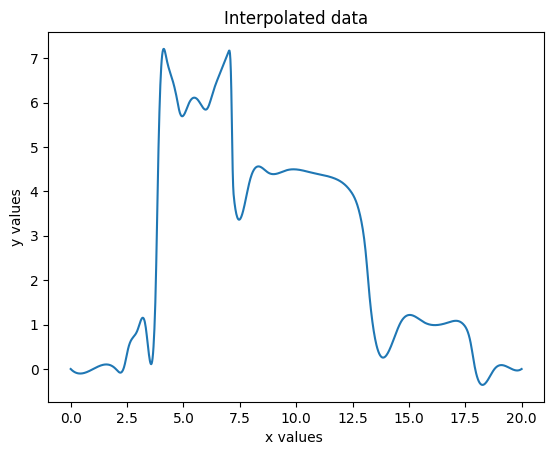

In [17]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
print(data.columns)
x = data['# x']
y = data[' y']
N = 992 # from my bday
x_new = np.linspace(x.min(), x.max(), N)
func = interp1d(x, y, kind='cubic')
y_new = func(x_new)
plt.xlabel("x values ")
plt.ylabel("y values")
plt.title("Interpolated data")
plt.plot(x_new, y_new)

**c.)** Plot the original function and the interpolated function on the same plot, to verify that the interpolation hasn't done anything surprising. [3 pts]

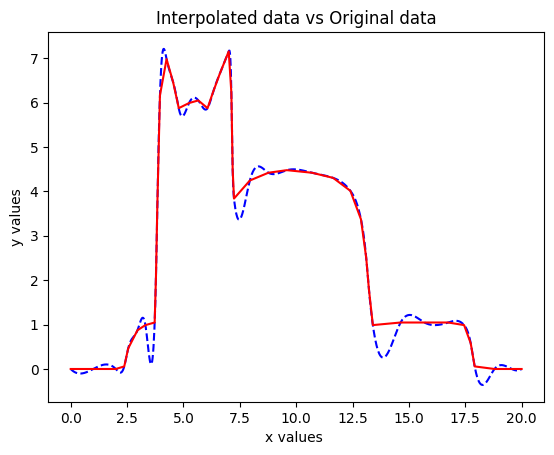

In [18]:
plt.xlabel("x values ")
plt.ylabel("y values")
plt.title("Interpolated data vs Original data")
plt.plot(x_new, y_new,'--',color='blue') # way better too look at w dotted lines instead
plt.plot(x, y, '-',color='red')

**d.)** Here we use the following set of definitions.  The complex Fourier amplitudes are given by
$$ A_n = a_n + i b_n = \sum_{\ell=0}^{N-1} f(x_\ell) \exp(-2\pi i k_n x_\ell)$$
and the original function can be reconstructed with those amplitudes by
$$ f(x_\ell) = \frac{1}{N} \sum_{n=0}^{N-1} \mathrm{Re}(A_n \exp(2\pi i k_n x_\ell))
  = \frac{1}{N} \sum_{n=0}^{N-1}\biggl[a_n \cos(2\pi k_n x_\ell) - b_n \sin(2\pi k_n x_\ell)\biggr].$$
 
 Form the Fourier series of your interpolated data points.  [4 pts]


Text(0.5, 1.0, 'Interpolated data vs Fourier Transform')

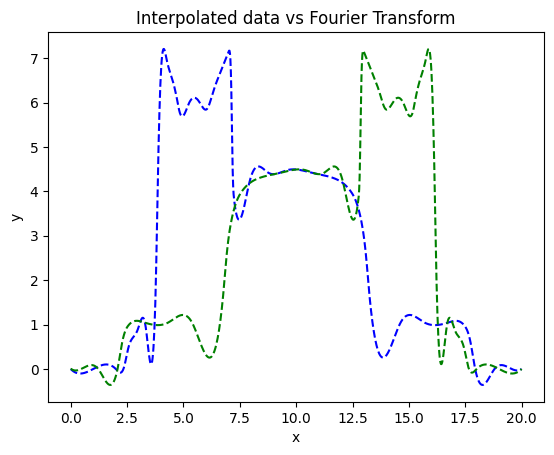

In [25]:
new_n = len(y_new)
A_n = np.fft.fft(y_new)
k_n = np.fft.fftfreq(N, (x_new.max() - x_new.min()) / new_n)
x_mask,k_mask = np.meshgrid(x_new,k_n)
i = np.zeros_like((y_new))
i = np.exp(-2j * np.pi * np.outer(k_n, x_new))
series = ((A_n @ i).real)/new_n
plt.plot(x_new,y_new,'--',color='blue')
plt.plot(x_new, series, '--', color='green')
# i
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolated data vs Fourier Transform")

**e.)** Reconstruct successive approximations to $f(x)$ by summing just the first few terms in the series.
In other words, the $m-$th approximation $\tilde{f}_m(x)$ keeps terms up to $m$ and can be written
$$ \tilde{f}_m(x_\ell) = \frac{1}{N} \sum_{n=0}^{m} \mathrm{Re}(A_n \exp(2\pi i k_n x_\ell)).$$
Notice that the sum only goes up to $m$ now instead of all the way to $N-1$.  Two points of note:
(i) The helper function `rfftfreq` gives you the spatial frequency $k_n= n/L$, where $L$ is the period of the function in question (the total length of the dataset, here), and 
(ii) `rfft` throws away the information associated with negative frequencies so all the amplitudes aside from $A_0$ need to be multiplied by 2 to recover the original function correctly. 

Plot the interpolated data with overlays of the successive approximations $\tilde{f}_m(x)$ for $m = 0, 2, 5, 15,$ and 31.  Include a legend so that we can distinguish which line is which. [10 pts]

Text(0.5, 1.0, 'Interpolated data vs Fourier Transform with different m values')

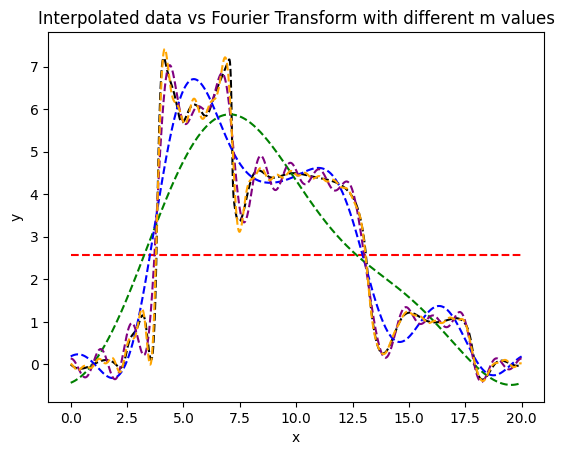

In [31]:
m = [0,2,5,15,31]
colors = ['red','green','blue','purple','orange']
plt.plot(x_new,y_new,'--',color='black')
for m,color in zip(m,colors):
    i = np.zeros_like((y_new),dtype=complex) 
    for j in range(m+1):
        i += A_n[j] * np.exp(2j * np.pi * k_n[j] * x_new)
    i = i/new_n
    plt.plot(x_new, i.real, '--', color=color)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolated data vs Fourier Transform with different m values")


**f.)** As a sanity check to verify that you understand the Fourier amplitudes, do the following computation.
Choose $n=1$; form the products $f(x_\ell) \cos(2\pi k_n x_\ell)$ and $f(x_\ell) \sin(2\pi k_n x_\ell)$, and make a new figure showing those products overlaid on the data points.  Compute $A_n$ from the explicit sum in the top equation and compare it to the corresponding value of $A_n$ returned by `rfft`.

(2417.188506906202+3065.4485841994783j)
(-4.7560335468819375-3.1982192375698206j)


Text(0.5, 1.0, 'Interpolated data vs Fourier Transform with setting A1')

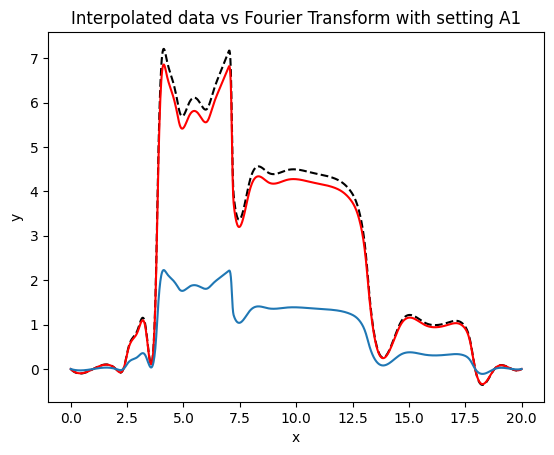

In [39]:
len_ = x_new.max() - x_new.min()
k_n = 1/len_
a_1 = np.sum(y_new * np.cos(2 * np.pi * k_n))
b_1 = np.sum(np.sin(2 * np.pi * k_n) * x_new)
A_1 = a_1 + 1j * b_1
print(A_1)
compA1 = 2 * A_n[1] / new_n #these two should be same
print(compA1)
plt.plot(x_new,y_new,'--',color='black')
plt.plot(x_new,y_new* (np.cos(2 * np.pi * k_n)),color='red')
plt.plot(x_new ,y_new * (np.sin(2 * np.pi * k_n)))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolated data vs Fourier Transform with setting A1")


### 2.  ODEs: Orbits

Finding the orbits of objects moving in a gravitational field basically amounts to solving the second-order ODE
$d^2 \mathbf{r}/dt^2 = -\vec{\nabla} \Phi,$ where $\Phi$ is the gravitational potential. 
As you have seen, we tackle this second-order ODE by recasting it in coupled first-order ODEs:
$$ \frac{dx}{dt} = v_x; ~~~~ \frac{dy}{dt} = v_y; ~~~~ \frac{dv_x}{dt} = -\frac{\partial\Phi}{\partial x}; ~~~~
       \frac{dv_y}{dt} = -\frac{\partial\Phi}{\partial y}.$$

       
(We're going to stick with 2D orbits.)  Here we'll try a few different types of gravitational potentials and explore the shapes of the orbits produced in those potentials.

**a.)** Our old friend the Keplerian potential for a mass $M$ at the origin of our coordinate system is $\Phi = -GM/r = -GM (x^2 + y^2)^{-1/2}.$  For simplicity we will work in a dimensionless coordinate system in which $GM=1.$  Thus $\frac{\partial\Phi}{\partial x} = x(x^2+y^2)^{-3/2}$ and $\frac{\partial\Phi}{\partial y} = y(x^2+y^2)^{-3/2}.$

Define a function that will calculate the acceleration of a particle moving in the Keplerian potential. [4 pts]

In [110]:
def particle_acceleration(vals):
    x,y = vals
    r = np.sqrt(x**2 + y**2)
    # y(x^2+y^2)^{-3/2
    return (-x * r**-3,-y * r**-3)
res = particle_acceleration((2,4))#testing
res

(-0.022360679774997894, -0.04472135954999579)

**b.)** Now integrate to find the orbit of such a particle.  I suggest you integrate from $t=0$ to $t=30,$
starting with the initial conditions $x=1,$ $y=0,$ $v_x = 0,$ and $v_y = 0.6.$  
You can use the leapfrog scheme outlined in our Reading/Lecture notes, or you can use the canned routines in SciPy.  If you use the canned routines, note that the default Runge-Kutta RK45 method is not good at conserving energy.   You'll get better results out of the DOP853 method.  [5 pts]

In [111]:
from scipy.integrate import solve_ivp
def f_x(t,state):
    x,y,vx,vy = state
    ax,ay = particle_acceleration((x,y))
    return np.array([vx,vy,ax,ay])
states = np.array([1,0,0,0.6],dtype=float)
t_vals = np.linspace(0,30,700) # the number of these values effect how smooth the graph is
res = solve_ivp(f_x,(0,30),states,t_eval=t_vals,method='DOP853')
res2 = solve_ivp(f_x,(0,30),states,t_eval=t_vals)
x,y,vx,vy = res.y
x2,y2,vx2,vy2 = res2.y

**c.)** Plot your orbit shape $(x ~\mathrm{vs}~ y)$.  You should find a closed elliptical orbit, just like Mr. Newton predicted. [3 pts]

Text(0, 0.5, 'y')

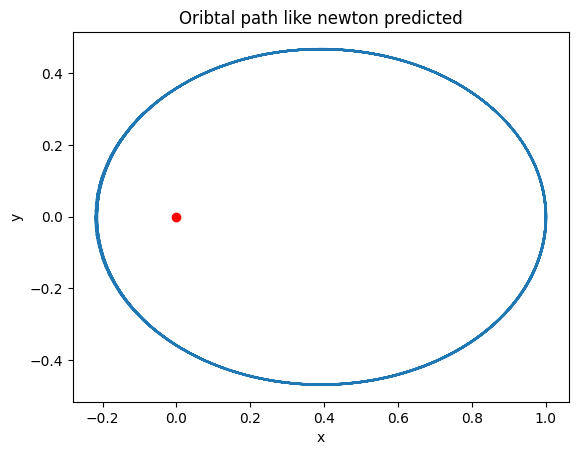

In [112]:
plt.plot(x,y)
plt.scatter([0],[0],color='red')
plt.title("Oribtal path like newton predicted")
plt.xlabel("x")
plt.ylabel("y")


**d.)** How well did you do with energy conservation?  Compute the specific total energy $E = \vec{v}\cdot\vec{v}/2 + \Phi$ and plot it as a function of time.  If you used the canned SciPy routines, try both RK45 and DOP853 methods, and plot the total energies of both solutions together on the same plot with appropriate labels. [4 pts]

Text(0, 0.5, 'Total energy')

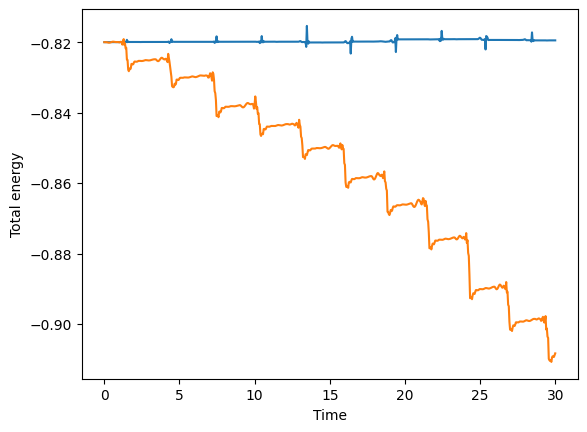

In [113]:
def calc_energy(vals):
    x,y,vx,vy = vals
    r = np.sqrt(x**2 + y**2)
    return( 1/2 * (vx**2 + vy**2) + (-1/r))
energy_with_dop = calc_energy((x,y,vx,vy))
energy_rk = calc_energy((x2,y2,vx2,vy2))
plt.plot(t_vals,energy_with_dop)
plt.plot(t_vals,energy_rk)
plt.xlabel("Time")
plt.ylabel("Total energy")

**e.)** Now try a slightly different form of the gravitational potential.  The Plummer potential is 
$$\Phi = \frac{-GM}{\sqrt{r^2 + a_p^2}} = -GM(x^2 + y^2 + a_p^2)^{-1/2},$$ where $a_p$ is a constant.  This function has a smoother behavior at $r=0$ and is a better match to the potential within a non-point mass distribution like the bulge of a galaxy.
Write a new function to calculate the acceleration of a particle moving in the Plummer potential, and integrate it to find the orbit of a particle with the same ICs as you used for the Kepler potential.  Try $a_p = 0.2.$  Plot the orbit shape. [7 pts]

Text(0.5, 1.0, 'Orbital path')

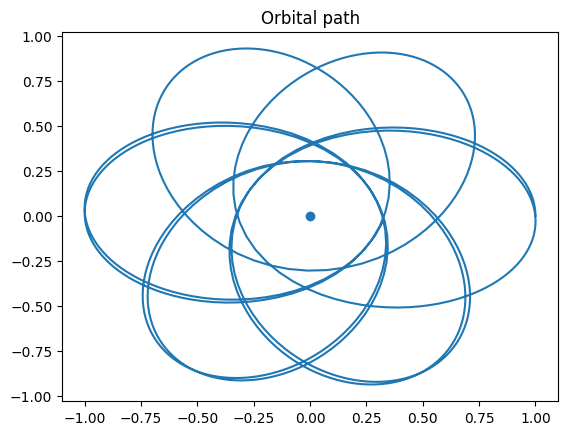

In [114]:
def plummer(t,state):
    x,y,vx,vy = state
    ap = 0.2
    r_2 = x**2+y**2+ap**2
    ax = -x/(r_2**(3/2))
    ay = -y/(r_2**(3/2))
    return np.array([vx,vy,ax,ay])
states = [1, 0, 0, 0.6]
t_vals = np.linspace(0, 30, 700)
pl_sol = solve_ivp(plummer,(0,30),states, method='DOP853', t_eval=t_vals)
x,y,vx,vy = pl_sol.y
plt.plot(pl_sol.y[0],pl_sol.y[1])
plt.scatter([0],[0])
plt.title("Orbital path")


**f.)** Check energy conservation again for this orbit in the Plummer potential. [3 pts]

Text(0.5, 1.0, 'Plummer Potential Energy Conservation')

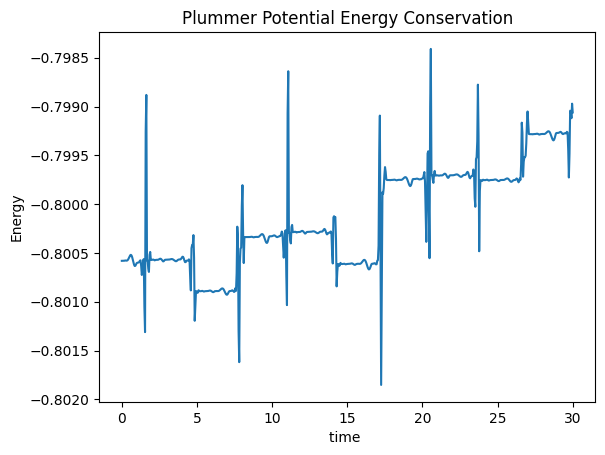

In [115]:
def calc_energy(vals):
    x,y,vx,vy = vals
    r = np.sqrt(x**2 + y**2 +0.2**2)
    return( 1/2 * (vx**2 + vy**2) + (-1/r))
# same again
# print(pl_sol.y)
x, y, vx, vy = pl_sol.y
energies = [calc_energy((x[i], y[i], vx[i], vy[i])) for i in range(len(t_vals))]

plt.plot(t_vals,energies)
plt.xlabel("time ")
plt.ylabel("Energy")
plt.title("Plummer Potential Energy Conservation")

**g.)** Things get really wild when the potential is not axisymmetric.  This can happen in a barred spiral galaxy, for example.  The force on the particle will not be radial, and therefore the orbit's angular momentum is not conserved.  Experiment with a bar potential:
$$ \Phi = \frac{1}{2} \ln(R_c^2 + x^2 + y^2/q^2),$$
where $R_c$ is another constant and $q$ describes the flattening of the equipotential surfaces $(0 \leq q \leq 1)$.  This function gives $\partial\Phi/\partial x = x(R_c^2 + x^2 + y^2/q^2)^{-1}$.
Write another function to integrate orbits in this potential; try $R_c = 0.14$ and $q=0.8,$ and integrate again for the same ICs you've been using.  Plot the orbit shape.

This set of ICs describes an orbit with a relatively high angular momentum.  While the angular momentum isn't constant, the orbit does at least have a constant sense of circulation around the origin. [7 pts]

Text(0, 0.5, 'y')

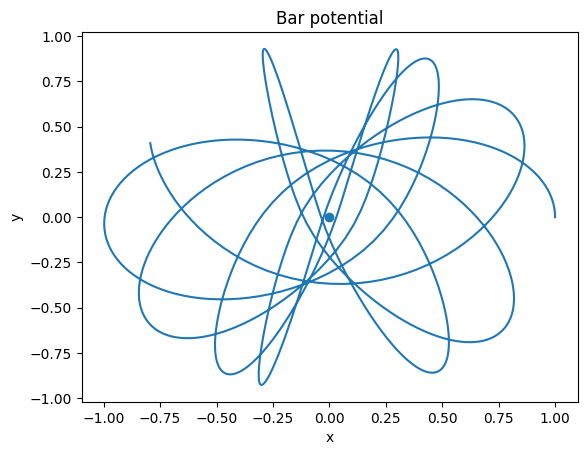

In [116]:
Rc=0.14
q=0.8
def bar_p(t,state):
    x,y,vx,vy = state
    r2 = Rc**2 + x**2 + (y**2 / q**2)
    ax = -x / r2
    ay = -(y / q**2) / r2
    return np.array([vx, vy, ax, ay])
bar_sol = solve_ivp(bar_p, (0, 30), states, method='DOP853', t_eval=t_vals)
plt.plot(bar_sol.y[0],bar_sol.y[1])
plt.title("Bar potential")
plt.scatter([0],[0]) #display origin
plt.xlabel("x")
plt.ylabel("y")


**h.)** Try a couple of other sets of initial conditions.  This potential produces lots of orbits that look a bit like Lissajous curves and have names like fish, banana, and pretzel orbits.  In these orbits, the angular momentum can pass through zero, so you can find many of them by releasing your particle from rest at a variety of different positions that are not on the $x-$ or $y-$ axes.  Plot at least two interesting orbit shapes. [6 pts]

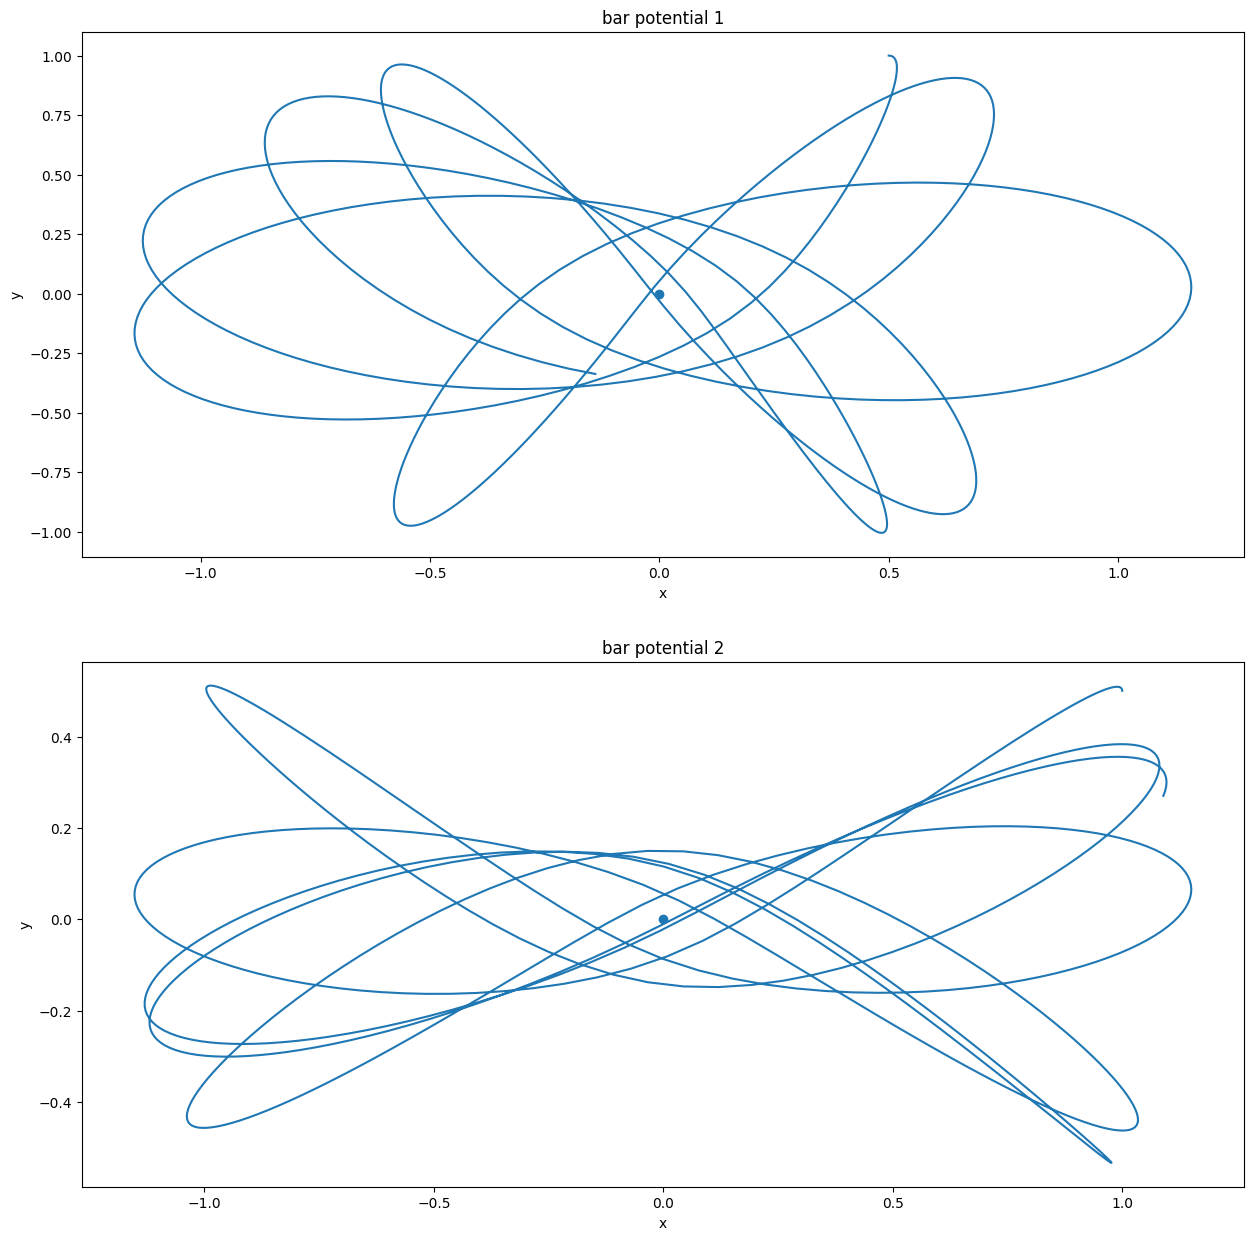

In [117]:
init_conds = [[0.5, 1, 0.1, 0],[1, 0.5, 0, 0.1]]
plt.figure(figsize=(15,15))
for i,ic in enumerate(init_conds,1):
    bar_sol = solve_ivp(bar_p, (0, 30), ic, method='DOP853', t_eval=t_vals)
    plt.subplot(2,1,i)
    plt.plot(bar_sol.y[0],bar_sol.y[1])
    plt.scatter([0],[0])
    plt.title(f"bar potential {i }")
    plt.xlabel('x')
    plt.ylabel('y')

**i.)** Verify that the orbits in the Plummer potential conserve angular momentum whereas the ones in the asymmetric potential don't.  In other words, plot the (specific) angular momentum $\mathbf{L} = \mathbf{r} \times \mathbf{v}$ as a function of time for your orbit in the Plummer potential and for another in the asymmetric bar potential. [5 pts]

Text(0, 0.5, 'Specific Angular Momentum')

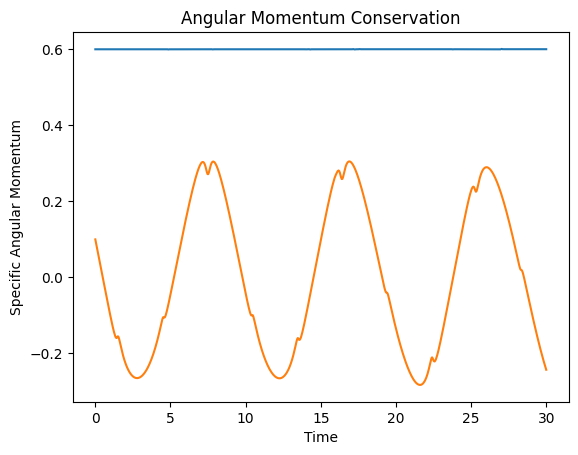

In [119]:

def ang_mom(state):
    x, y, vx, vy = state
    return x * vy - y * vx
plummer = ang_mom((pl_sol.y[0], pl_sol.y[1], pl_sol.y[2], pl_sol.y[3]))
new_L_bar = ang_mom((bar_sol.y[0], bar_sol.y[1],bar_sol.y[2], bar_sol.y[3]))
plt.plot(t_vals,plummer)
plt.plot(t_vals,new_L_bar)
plt.title('Angular Momentum Conservation')
plt.xlabel('Time')
plt.ylabel('Specific Angular Momentum')

### 3.  Work with a FITS data cube and velocity field

Here we'll carry out some relatively simple mathematical operations on a data cube to estimate the rotation velocity of a galaxy.  


**a.)** Open and read the image cube FITS file `ngc4596.fits`.  It gives the intensity of spectral line emission from the CO molecule, as a function of two spatial dimensions (positions on the sky) and one frequency or velocity dimension. (Frequency maps to velocity via the Doppler shift.)  [2 pts]

In [122]:
from astropy.io import fits
path = "ngc4596.fits"
data = fits.open(path)
image = data[0].data
header = data[0].header
image.shape, header.cards[:10]


143 121 693


((693, 121, 143),
 ('SIMPLE', True, 'Standard FITS')
 ('BITPIX', -32, 'Floating point (32 bit)')
 ('NAXIS', 3, '')
 ('NAXIS1', 143, '')
 ('NAXIS2', 121, '')
 ('NAXIS3', 693, '')
 ('EXTEND', True, '')
 ('BSCALE', 1.0, 'PHYSICAL = PIXEL*BSCALE + BZERO')
 ('BZERO', 0.0, '')
 ('BMAJ', 0.0001665744115141, ''))

**b.)** Inspect the FITS header and the world coordinate system (WCS) of the data cube.  Notice that the FITS file's first axis is Right Ascension, the second axis is Declination, and the third axis is velocity.  However,
when the cubes are read into numpy arrays, the first axis becomes velocity, the second is Dec, and the third is RA.  Compare NAXIS1, NAXIS2, and NAXIS3 to the shape of the numpy arrays so that you can satisfy yourself on this point. [2 pts]

In [123]:
print(header['NAXIS1'], header['NAXIS2'], header['NAXIS3'])
print("RA axis size:", header['NAXIS1'])
print("Dec axis size:", header['NAXIS2'])
print("Velocity axis size:", header['NAXIS3'])

143 121 693
RA axis size: 143
Dec axis size: 121
Velocity axis size: 693


**c.)** Integrated intensity image

Project the data cube into a 2D image by summing over the velocity axis.  This is a simple way to create an integrated intensity image. [3 pts]

In [129]:
img_sum = np.sum(image, axis=0)
img_sum.shape

(121, 143)

**d.)** Display the integrated intensity image with nicely formatted astronomical RA and Dec coordinates on the axes.  Hint --- if you read the file with `astropy.io.fits` you can create a wcs object from the header (see `astropy.wcs.WCS`).  It will have 3 axes.  To get correct axis labels on the 2D image, you will need to make a new wcs with only the 2 spatial axes; see `wcs.dropaxis()`.  If you read the file with `CCDData.read`, it will ignore the velocity axis entirely, so you won't need to manually drop the 3rd axis.

*Checkpoint:* You should see a moderately bright peak in the center of the image and an extended, diffuse low surface brightness disk that is roughly elliptical in shape.  Pixels around the outside edges and in the corners are filled with thermal noise. [4 pts]

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


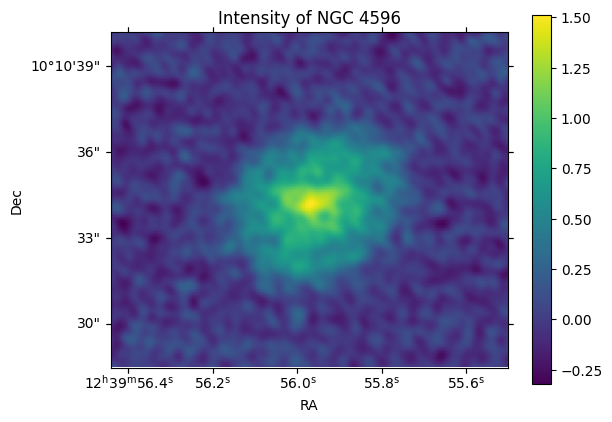

In [133]:
from astropy.wcs import WCS
wcs = WCS(header)
wcs = wcs.dropaxis(2)
ax = plt.subplot(projection=wcs)
im = ax.imshow(img_sum, origin='lower', cmap='viridis')
ax.coords[0].set_axislabel('RA')
ax.coords[1].set_axislabel('Dec')
ax.set_title('Intensity of NGC 4596')
plt.colorbar(im, ax=ax)
plt.show()

**e.)** Velocity information

Use the header parameters of the original data cube to obtain the velocity information (the mapping between frequency channel number and Doppler velocity). 
  CRVAL3 is the velocity value at channel or pixel number CRPIX3 and CDELT3 is the channel width (the step size between one channel and the next).   Create 1D arrays storing the frequency channel information and the velocities of the corresponding channels.  You'll need the velocity array for later analysis.
  
*Checkpoint:* You should find the spectrum covers velocities 1809 to 2249 km/s with a channel width of 0.63 km/s. (The FITS standard is 1-based, rather than 0-based like python.) [3 pts]

In [140]:
CRVAL3,CRPIX3,CDELT3 = header['CRVAL3'],header['CRPIX3'],header['CDELT3']
vel_ranges = image.shape[0]
velocity = (np.arange(vel_ranges) - (CRPIX3 - 1)) * CDELT3 + CRVAL3
print(f"Velocity {velocity.min()} is min and {velocity.max()} is max")
print(f"Width {(CDELT3)}")


Velocity 1808566.90970373 is min and 2247876.3413663944 is max
Width -634.8402191657


**f.)** Velocity field, version 1

We're going to estimate the velocity of the gas at each position in the galaxy.  To explain how this is done, we need to talk through a little math first.

Consider an individual spectrum.  It consists of intensity measurements ($I_j$) as a function of velocity ($v_j$), for a fixed spatial position.  Here $j$ is just a dummy index that runs over the velocity axis, which has $N$ channels.  

We calculated the integrated intensity by computing the sum  $I_{tot} = \sum_{j=0}^{N-1} I_j$ for every spatial position in the image.
If we wanted to calculate the average intensity $\langle I \rangle$ we would normalize that sum: 
$$ \langle I \rangle =  \frac{\sum_{j=0}^{N-1} I_j }{\sum_{j=0}^{N-1} 1} = \frac{1}{N} \sum_{j=0}^{N-1} I_j.$$
We're writing the average in that slightly pendantic way in order to motivate the idea of a weighted average, which we'll do next.

Estimate the velocity at each position in the galaxy by calculating the intensity-weighted mean velocity at each spatial position.  In other words:
$$ \langle v \rangle = \frac{\sum_{j=0}^{N-1} v_j I_j}{\sum_{j=0}^{N-1} I_j}.$$

Compute the intensity-weighted mean velocity at each spatial position in the galaxy, as described above.
For full credit, you should carry out this task without using explicit loops (e.g. `for` or `while`).
You should end up with a 2D image where the values in the image are those mean velocities. [7 pts]

In [142]:
intensity = np.sum(image, axis=0)
vel_new = np.sum(image *velocity[:, np.newaxis, np.newaxis] ,axis=0)
mean_vel = np.where(intensity>0,vel_new/intensity,0)
mean_vel[:1]

array([[ 2147376.42443075,  2203617.69860994,  2546339.89046745,
               0.        ,        0.        ,        0.        ,
         2247044.38299168,  2043531.40490574,  2014754.77815555,
         2043205.58398175,  2146702.89513151,  2289280.21935381,
         2386228.34172798,  2477320.73147354,  2691159.2469346 ,
         4277434.87338225,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ,
               0.        ,  1892865.29090607,  1946252.24544478,
         1965481.05472567,  1963144.54165829,  1954778.53780971,
         1954634.87186334,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ,
               0.        ,  2629612.09673565,  2181269.62614755,
         2096611.35088889,  2056674.45819944,  1759622.66658627,
               0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,   715238.50003976,
         1895603.38785983

**g.)** Display your image of the velocity field, with proper astronomical coordinates on the axes.  Include a colorbar (with a label) to help readers interpret the color information in terms of velocities.

*Checkpoint:*  We should be able to see high velocities on one side of the galaxy and low velocities on the other side,  because the galaxy is rotating.  There will be lots of noisy junk around the edges of the image where there is no real signal. [4 pts]

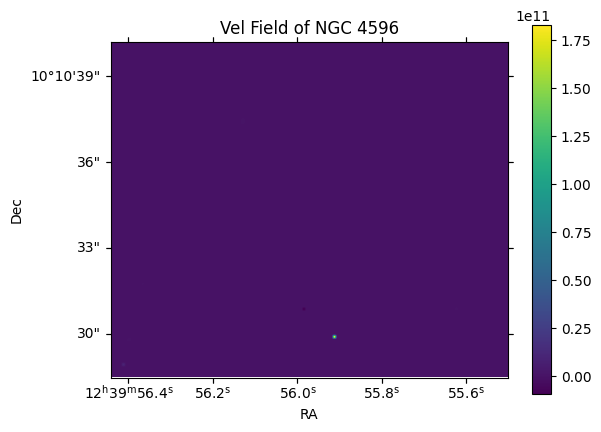

In [172]:
i, axis = plt.subplots(subplot_kw={'projection': wcs})
im = axis.imshow(mean_vel, cmap='viridis')
axis.coords[0].set_axislabel('RA')
axis.coords[1].set_axislabel('Dec')
axis.set_title('Vel Field of NGC 4596')
plt.colorbar(im, ax=axis)

**h.)** For the next iteration, we need an estimate of the noise value $\sigma$ in the cube.  You can obtain this estimate from the standard deviation of all the values in the cube.  (Strictly speaking we should use some kind of clipping or outlier rejection to eliminate the signal before computing the standard deviation, but it's not a big deal in this case since there aren't very many pixels with signal.) [2 pts]

In [153]:
S = np.std(image)
print(f"sigma: {S}")

sigma: 0.00226276065222919


**i.)** As a sanity check on your estimate of the standard deviation, plot a histogram of the values in the datacube.  Adjust the range of the histogram and/or the bin size so that you see a well-sampled, approximately Gaussian peak in the center of the histogram.  This peak will come from the large number of pixels that contain no signal and only thermal noise, and its full width at the half-maximum points should be very roughly twice the rms value you calculated above.  Label the histogram appropriately -- the brightness unit in the datacube is given by the `BUNIT` parameter of the header.  [3 pts]

Text(0, 0.5, 'Frequency')

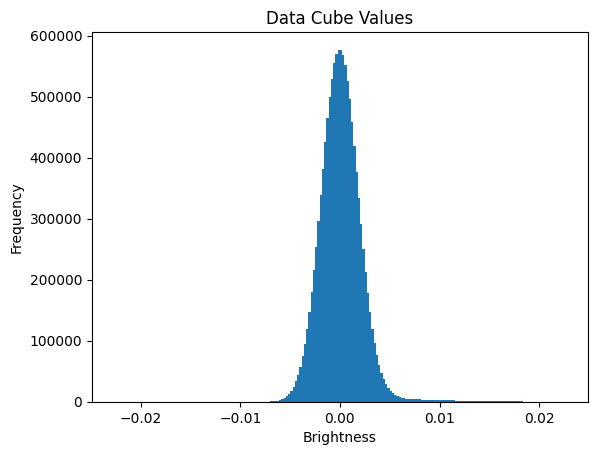

In [159]:
flat = image.flatten()
plt.hist(flat,bins=200,range=[-10*S, 10*S])
plt.title("Data Cube Values")
plt.xlabel("Brightness")
plt.ylabel('Frequency')

**j.)** Velocity field, version 2

Now make an improved estimate of the velocity field.  The idea here is to compute the mean velocity as in part (f) above, but rather than using all of the datapoints, use *only* the datapoints whose intensities $I_j > 3.0\sigma.$  Those intensities are unlikely to represent thermal noise and are more likely to represent real signal.  Implement this selection criterion, re-calculate the estimated velocity field, and display the new version.  Include all the axis labels and the colorbar as before.  You should have a much cleaner image, with only a few scattered noisy points outside the galaxy's disk. [7 pts]

C:\Users\eklav\AppData\Local\Temp\ipykernel_51628\3359960101.py:5: RuntimeWarning: invalid value encountered in divide
  mean_fil = np.where(int_fil > 0, vel_fil / int_fil, 0)


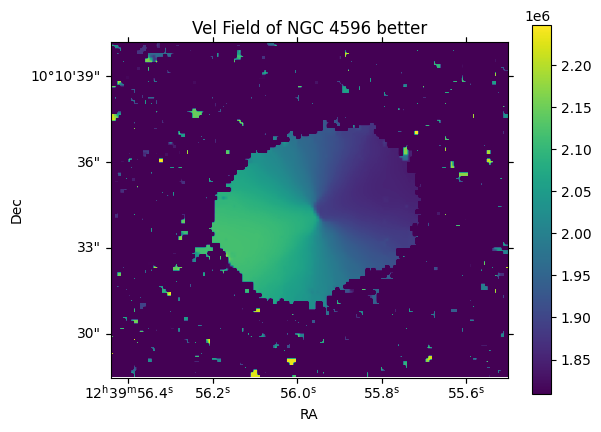

In [170]:
mask = image > S * 3
vel_fil = np.sum(image * mask * velocity[:, np.newaxis, np.newaxis],axis=0)
int_fil = np.sum(image * mask, axis=0)
# vel_fil,int_fil
mean_fil = np.where(int_fil > 0, vel_fil / int_fil, 0)
i, axis = plt.subplots(subplot_kw={'projection': wcs})
im = axis.imshow(mean_fil, cmap='viridis', vmin=np.min(velocity), vmax=np.max(velocity))
axis.coords[0].set_axislabel('RA')
axis.coords[1].set_axislabel('Dec')
axis.set_title('Vel Field of NGC 4596 better')
plt.colorbar(im, ax=axis)
# just copy pasted from 2 q ago

**k.)** Velocity field, version 3

Make a third estimate of the velocity field.  Use the selection criteria again, but this time instead of weighting by the intensity ($I_j$), weight by the intensity squared.  Subtract your last two velocity field estimates, producing a 2D image of the difference. Display the difference image with an appropriate color scaling, colorbar, and all necessary labels. What is the maximum value of the difference in the center part of the galaxy? [7 pts]

C:\Users\eklav\AppData\Local\Temp\ipykernel_51628\3861200683.py:2: RuntimeWarning: invalid value encountered in divide
  mean_2 = np.where(int_fil > 0,vel_2/ int_fil, 0)


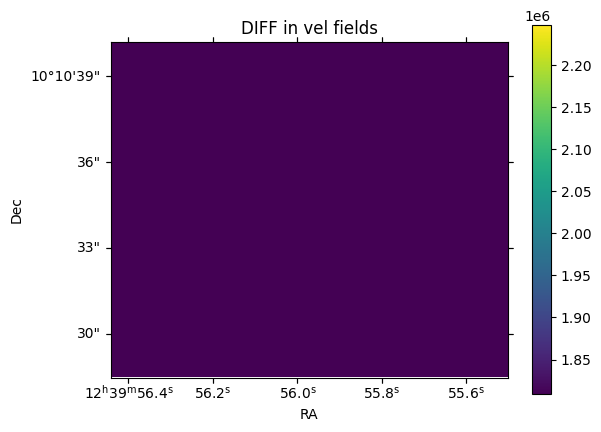

In [169]:
vel_2 = np.sum(image * mask * (velocity[:, np.newaxis, np.newaxis])**2, axis=0)
mean_2 = np.where(int_fil > 0,vel_2/ int_fil, 0)
diff = mean_fil -mean_2
i, axis = plt.subplots(subplot_kw={'projection': wcs})
im = axis.imshow(diff, cmap='viridis', vmin=np.min(velocity), vmax=np.max(velocity))
axis.coords[0].set_axislabel('RA')
axis.coords[1].set_axislabel('Dec')
axis.set_title('DIFF in vel fields')
plt.colorbar(im, ax=axis)
# just copy pasted from 2 q ago

**l.)** *Extra Credit* 

Download the HST image `hst_15133_49_wfc3_uvis_f475w_idkv49_drc.fits`.  It shows a similar region of the sky to the radio data cube.  Make a cutout of the HST image with the appropriate size and shape such that the cutout shows the exact same region on the sky as the radio integrated intensity image (part c-d).  Display the radio image next to the HST cutout.  You can figure out how to specify the size and shape of the cutout by trial and error, or you can work with the two wcs's.  Choosing the color scale on the HST image is nontrivial, but if you get it right, you should be able to see some darker dust clouds coincident with the radio disk. [10 pts]

Text(0.5, 1.0, 'Integrated Intensity')

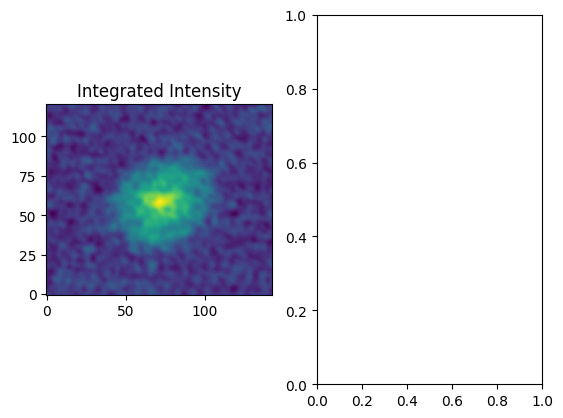

In [180]:
from astropy.nddata import Cutout2D
path = "ngc4596.fits"
data = fits.open(path)
image = data[0].data
header = data[0].header
wcs = WCS(header)
sum1 = np.sum(image,axis=0)

image.shape, header.cards[:10]

path2 = "hst_15133_49_wfc3_uvis_f475w_idkv49_drc.fits"
file2 = fits.open(path2)
data2 = file2[0].data
header2 = file2[0].header
wcs2 = WCS(header2)
sum2 = np.sum(data2,axis=0)

# cutout = Cutout2D(data2,position =0,size = sum1.shape,wcs=wcs2) #cant find position correctly
# but if I correct coords there
i, axis = plt.subplots(1, 2)
axis[0].imshow(sum1, origin='lower', cmap='viridis')
axis[0].set_title('Integrated Intensity')
# ax[1].imshow(cutout.data, cmap='viridis')
# ax[1].set_title('Cutout of HST')